### ¿Existen patrones temporales en la cantidad de viajes (horas pico, días de la semana, meses)?

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Agrupar por fecha (por día) y contar
frecuencia_fechas = route_df['fecha_origen_recorrido'].dt.date.value_counts().sort_index()
frecuencia_fechas = frecuencia_fechas.sort_index()

# --- Gráfico de líneas con solo el primer día del mes en el eje X ---
plt.figure(figsize=(12, 6))
plt.plot(frecuencia_fechas.index, frecuencia_fechas.values, linestyle='-')
plt.title('Frecuencia de viajes por fecha de origen')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')
plt.ylim(bottom=0)
plt.xticks(rotation=45)

# Formatear eje X para mostrar solo el primer día de cada mes
locator = mdates.MonthLocator(bymonthday=1)
formatter = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Obtener nombre del día de la semana
route_df['dia_semana'] = route_df['fecha_origen_recorrido'].dt.day_name()

# Agrupar por día de la semana
frecuencia_dia_semana = route_df['dia_semana'].value_counts()
# Ordenar manualmente (los value_counts() no conservan el orden natural)
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
frecuencia_dia_semana = frecuencia_dia_semana.reindex(dias_ordenados)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(frecuencia_dia_semana.index, frecuencia_dia_semana.values, linestyle='-', color='steelblue')
plt.title('Frecuencia de viajes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de viajes')
plt.ylim(bottom=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Extraer año y mes
route_df['anio_mes'] = route_df['fecha_origen_recorrido'].dt.to_period('M')

# Agrupar por año-mes
frecuencia_por_mes = route_df['anio_mes'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(12, 5))
plt.plot(frecuencia_por_mes.index.astype(str), frecuencia_por_mes.values, linestyle='-', color='darkgreen')
plt.title('Frecuencia de viajes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de viajes')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Histograma por hora del día
route_df['hora_origen_recorrido'] = route_df['fecha_origen_recorrido'].dt.hour
plt.figure(figsize=(12, 6))
sns.histplot(route_df['hora_origen_recorrido'], bins=24, kde=True)
plt.title('Distribución de viajes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de viajes')
plt.xticks(range(0, 24))
plt.xlim(0, 23)
plt.grid(True)
plt.tight_layout()
plt.show()

Viendo los histogramas de frecuencia de los viajes aumenta significativamente entre las 7 y las 8 de la mañana, llegando a un pico entre las 17 y 18 horas. Esto es consistente con el uso del servicio por parte de trabajadores que utilizan la bicicleta como medio de transporte para ir a trabajar y volver a sus viviendas. En cuanto a los días de la semana, se observa que el los fines de semana tiene una cantidad significativamente menor de viajes. También se observa que el uso del servicio es mayor en los meses de verano, y que en invierno la cantidad de viajes disminuye. Esto puede estar relacionado con el clima, ya que en invierno las temperaturas son más bajas y se desincentiva el uso de bicicletas

### ¿Hay alguna tendencia la longitud o duración de los viajes según el grupo etario?

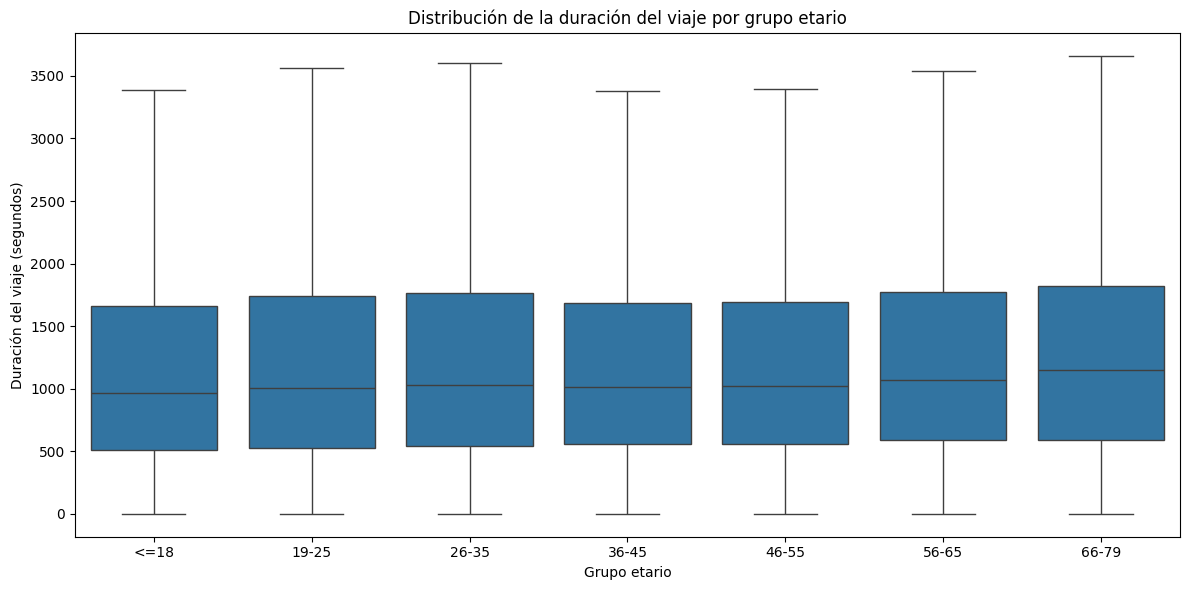

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear grupos etarios (bins)
bins = [0, 18, 25, 35, 45, 55, 65, 80]
labels = ['<=18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-80']
route_df['grupo_edad'] = pd.cut(route_df['edad_usuario'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=route_df,
    x='grupo_edad',
    y='duracion_recorrido',
    showfliers=False
)
plt.title('Distribución de la duración del viaje por grupo etario')
plt.xlabel('Grupo etario')
plt.ylabel('Duración del viaje (segundos)')
plt.tight_layout()
plt.show()



Si bien al analizar los viajes por duración y grupo etario no se observa una tendencia clara, se puede ver que la mediana segun el grupo etario va aumentando con la edad. Esto puede ser un indicio de que los viajes son más largos a medida que aumenta la edad, pero no es concluyente. Podemos intentar analizarlo por distancia recorrida en vez de duración. Para esto, se utiliza la función de Haversine para calcular la distancia entre las estaciones de origen y destino, y se agrupan los datos por grupo etario.

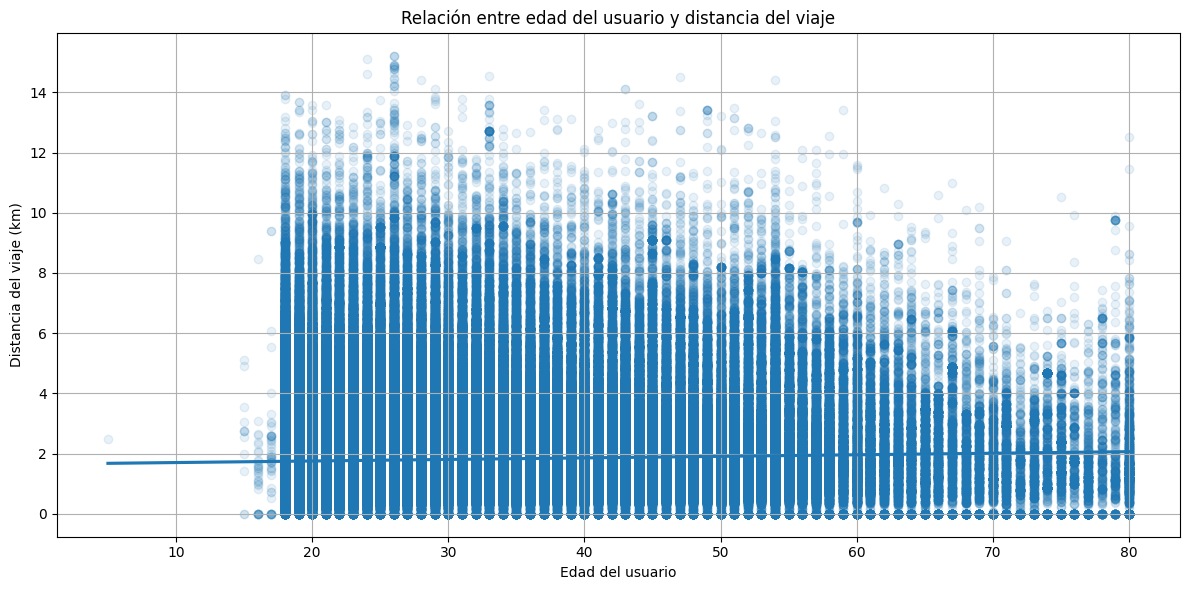

In [ ]:
# Seleccionar solo filas donde ambos valores no son nulos
mask = route_df['edad_usuario'].notna() & route_df['distancia_km'].notna()

plt.figure(figsize=(12, 6))
sns.regplot(
    data=route_df.loc[mask],
    x='edad_usuario',
    y='distancia_km',
    scatter_kws={'alpha':0.1},
)
plt.title('Relación entre edad del usuario y distancia del viaje')
plt.xlabel('Edad del usuario')
plt.ylabel('Distancia del viaje (km)')
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa que cuando se lo analiza por distancia hay una baja significativa de los kilometros recorridos a medida que aumenta la edad. Hay un aumento hasta llegar a un pico al rededor de los 28 años. A partir de este punto, se nota una baja en los kilometros recorridos hasta los 80 años. Esto puede estar relacionado con la condición física de los ciclistas, ya que a medida que aumenta la edad disminuye la capacidad física y se tiende a realizar viajes más cortos. También se observa que el grupo de 18 a 30 años es el que más utiliza el servicio, lo cual puede estar relacionado con el uso del servicio por parte de estudiantes universitarios.

Si bien veíamos que la duración de los viajes era relativamente constante, sin importar los años, al analizar la distancia recorrida se observa que se recorren menos kilómetros. Para dar una mejor imagen, podemos comparar los mismos recorridos por edad y comparar la duración de los viajes.

/var/folders/ml/gmqmyfhd39bc7mggbpwznw0r0000gn/T/ipykernel_7444/1665413967.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteos = df.groupby(['id_estacion_origen', 'id_estacion_destino', 'grupo_edad']).size().reset_index(name='cantidad')
/var/folders/ml/gmqmyfhd39bc7mggbpwznw0r0000gn/T/ipykernel_7444/1665413967.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['id_estacion_origen', 'id_estacion_destino', 'grupo_edad'])


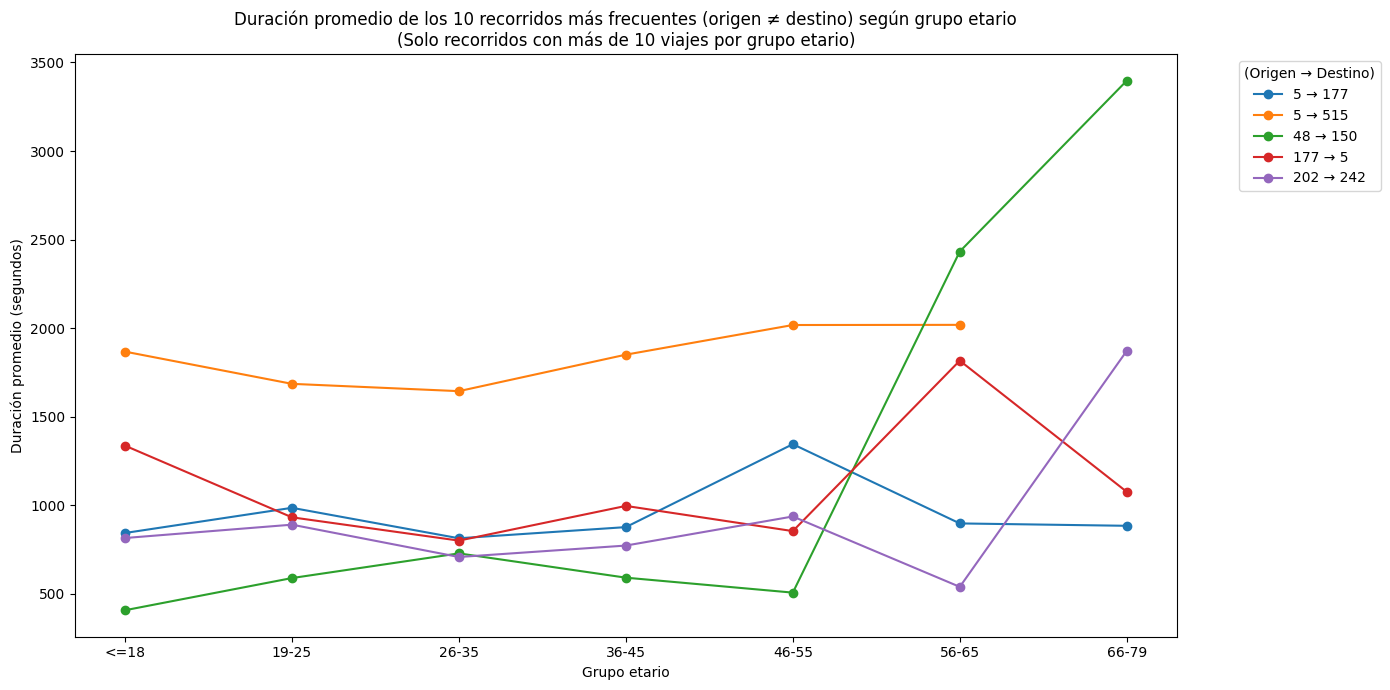

In [ ]:
df = route_df.dropna(subset=['edad_usuario'])

# Contar la cantidad de viajes por origen, destino y grupo etario
conteos = df.groupby(['id_estacion_origen', 'id_estacion_destino', 'grupo_edad']).size().reset_index(name='cantidad')

# Filtrar solo los recorridos con más de 10 viajes para ese grupo etario
recorridos_validos = conteos[conteos['cantidad'] > 10][['id_estacion_origen', 'id_estacion_destino', 'grupo_edad']]

# Agrupar por origen, destino y grupo etario, y calcular la duración promedio
agrupado = (
    df.groupby(['id_estacion_origen', 'id_estacion_destino', 'grupo_edad'])
    ['duracion_recorrido']
    .mean()
    .reset_index()
)

# Mostrar los recorridos más frecuentes y su duración promedio por grupo etario
top_routes = (
    df.groupby(['id_estacion_origen', 'id_estacion_destino'])
    .size()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrar solo los recorridos indicados
recorridos_seleccionados = [
    (48, 150),
    (5, 515),
    (202, 242),
    (5, 177),
    (177, 5)
]

agrupado_top = agrupado[
    agrupado[['id_estacion_origen', 'id_estacion_destino']].apply(tuple, axis=1).isin(recorridos_seleccionados)
]

# Graficar líneas: una línea por recorrido (origen-destino), eje X grupo etario, eje Y duración
plt.figure(figsize=(14, 7))
for (origen, destino), data in agrupado_top.groupby(['id_estacion_origen', 'id_estacion_destino']):
    plt.plot(
        data['grupo_edad'],
        data['duracion_recorrido'],
        marker='o',
        label=f'{origen} → {destino}'
    )
plt.title('Duración promedio de los 10 recorridos más frecuentes (origen ≠ destino) según grupo etario\n(Solo recorridos con más de 10 viajes por grupo etario)')
plt.xlabel('Grupo etario')
plt.ylabel('Duración promedio (segundos)')
# plt.yscale('log')
# plt.yticks([10, 100, 1000], ['100s', '1000s', '10000s'])
plt.legend(title='(Origen → Destino)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Comparando la mediana de duración en los recorridos más tomados se pueden tomar dos conclusiones. En la mayoría de los casos puede verse que a partír de los 45-55 años la duración de los viajes aumenta para el mismo recorrido. También se observa que en muchos casos pasa lo mismo con los menores de 18 años. Si bien no aplica a todos los recorridos, en la mayoría, se ve que en un rango de 26 a 35 años la duración de los viajes es la más corta.